In [9]:
from fastai import *
from fastai.text import *

In [2]:
!wget 'https://he-s3.s3.amazonaws.com/media/hackathon/deep-learning-challenge-4/predict-the-energy-used-612632a9-3f496e7f-9da84021/d583b256-d-new_dataset.7z'

--2018-12-25 16:41:59--  https://he-s3.s3.amazonaws.com/media/hackathon/deep-learning-challenge-4/predict-the-energy-used-612632a9-3f496e7f-9da84021/d583b256-d-new_dataset.7z
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.32.124
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.32.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 355228885 (339M) [application/x-7z-compressed]
Saving to: ‘d583b256-d-new_dataset.7z’

d583b256-d-new_data 100%[===================>] 338.77M   111KB/s    in 4m 5s   

2018-12-25 16:46:05 (1.38 MB/s) - ‘d583b256-d-new_dataset.7z’ saved [355228885/355228885]



In [4]:
!sudo apt-get install p7zip-full -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  p7zip
Suggested packages:
  p7zip-rar
The following NEW packages will be installed:
  p7zip p7zip-full
0 upgraded, 2 newly installed, 0 to remove and 0 not upgraded.
Need to get 1,479 kB of archives.
After this operation, 5,469 kB of additional disk space will be used.
Get:1 http://deb.debian.org/debian stretch/main amd64 p7zip amd64 16.02+dfsg-3+deb9u1 [364 kB]
Get:2 http://deb.debian.org/debian stretch/main amd64 p7zip-full amd64 16.02+dfsg-3+deb9u1 [1,115 kB]
Fetched 1,479 kB in 0s (40.3 MB/s)
Selecting previously unselected package p7zip.
(Reading database ... 82683 files and directories currently installed.)
Preparing to unpack .../p7zip_16.02+dfsg-3+deb9u1_amd64.deb ...
Unpacking p7zip (16.02+dfsg-3+deb9u1) ...
Selecting previously unselected package p7zip-full.
Preparing to unpack .../p7zip-full_16.02+dfsg-3+deb9u1_amd64.deb ...
U

In [6]:
!7z x d583b256-d-new_dataset.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,8 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Sca        1 file, 355228885 bytes (339 MiB)

Extracting archive: d583b256-d-new_dataset.7z
--
Path = d583b256-d-new_dataset.7z
Type = 7z
Physical Size = 355228885
Headers Size = 245
Method = LZMA2:24
Solid = +
Blocks = 1

      1% 2 - new_dataset/test.cs                              2% 2 - new_dataset/test.cs                              3% 2 - new_dataset/test.cs                              4% 2 - new_dataset/test.cs                              5% 2 - new_dataset/test.cs                              6% 2 - new_dataset/test.cs                              7% 2 - new_dataset/test.cs                              8% 2 - new_dataset/test.cs                              9% 2 - new_dataset/test.cs                             10% 2 - new_dataset/test.cs     

In [10]:
path = Path('new_dataset')

In [11]:
path.ls()

[PosixPath('new_dataset/.ipynb_checkpoints'),
 PosixPath('new_dataset/sample_submission.csv'),
 PosixPath('new_dataset/test.csv'),
 PosixPath('new_dataset/sample_old.csv'),
 PosixPath('new_dataset/models'),
 PosixPath('new_dataset/tmp_lm_1'),
 PosixPath('new_dataset/data_clas'),
 PosixPath('new_dataset/train_sample.csv'),
 PosixPath('new_dataset/train_n.csv'),
 PosixPath('new_dataset/train.csv'),
 PosixPath('new_dataset/sample.csv')]

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv(path/'train.csv')

In [6]:
df.head()

,id,title,article,tags
0,HE-ece4370,Check requests to server from the application ...,<p>Is there a way to find what sort of request...,flash|http|websocket|communication|wireshark
1,HE-fad0d3b,Using Asc offset and desc in psql,<p>This code produces this</p>\r\r\r\r\n\r\r\r...,sql|postgresql|offset
2,HE-ea00013,What to do when you have much permissions with...,<p>I'm planning to use a binary system to hand...,php|permissions|binary|bit-manipulation
3,HE-df1304d,React remove component from list,"<p>Pretty new to React, coming from knockout</...",reactjs
4,HE-e946f8c,RPC with promises for node.js,<p>Are there any RPC modules which work with p...,javascript|node.js|websocket|rpc|promise


In [12]:
df['article'][0]

'<p>Is there a way to find what sort of requests does a Flash application send to a server?</p>\r\r\r\r\n\r\r\r\r\n<p>I was trying to see what information a client sends to the server using Chrome "inspect element", but it shows me that nothing is going on.</p>\r\r\r\r\n\r\r\r\r\n<p>But for sure the communication is going on. The website I am interesting in is <a href="http://www.chesscube.com/" rel="nofollow">http://www.chesscube.com/</a> and every time you make a move it somehow sends it to a server or may be just to another opponent. In the end of the game - it sends the game to the server for sure. But up till now, all I can see is just few images, being uploaded during the game.</p>\r\r\r\r\n\r\r\r\r\n<p>Thanks for help.</p>\r\r\r\r\n\r\r\r\r\n<p>P.S. I was trying to use wireshark to capture packets and in such a way to see the communication. Here what I was doing:</p>\r\r\r\r\n\r\r\r\r\n<p>Pinging chesscube.com to realize its ip-address: 78.47.2.115\r\r\r\r\nthan I am listening o

In [13]:
df['title'].head()

0    Check requests to server from the application ...
1                    Using Asc offset and desc in psql
2    What to do when you have much permissions with...
3                     React remove component from list
4                        RPC with promises for node.js
Name: title, dtype: object

In [14]:
df.tags

0              flash|http|websocket|communication|wireshark
1                                     sql|postgresql|offset
2                   php|permissions|binary|bit-manipulation
3                                                   reactjs
4                  javascript|node.js|websocket|rpc|promise
5                                                   android
6                                                      java
7                      c++|c|opencl|fractals|newtons-method
8                 visual-studio-2013|web-deployment-project
9                                                   android
10                                             logging|nlog
11                                      regex|download|wget
12                        javascript|performance|highcharts
13           macos|bash|command-line|command-line-arguments
14                     mysql|cakephp|sql-update|cakephp-2.0
15                                     php|html|css|twitter
16                                      

In [11]:
round(df.shape[0]*0.15,0)

118047.0

In [13]:
df_n = df.sample(n=118047)

df_n.to_csv(path/'sample.csv', index=False)

In [5]:
df_n = pd.read_csv(path/'sample_old.csv')
df_n.head()

,id,title,article,tags,is_valid
0,HE-e26746a,Composer.json to autoload classes,<p>So I was following this tutorial on how to ...,php|json,False
1,HE-ff813a6,design - state of object handled externally,<p>got a design related question:</p>\r\r\r\r\...,java|oop|design,False
2,HE-ff13aa5,Is there any reason in writing dict() instead ...,<p>I've heard that construction <code>{}</code...,python|python-3.x,False
3,HE-ea5ee68,Condition in a single column in mysql query,<p>I have a table name 'social_user' there is ...,mysql,False
4,HE-ed34826,msgpack deserialize c++,"<p>When I parse from the buffer, I have to kno...",c++|msgpack|messagepack,False


In [14]:
df_n = pd.read_csv(path/'sample.csv')
df_n.head()

,id,title,article,tags,is_valid
0,HE-e26746a,Composer.json to autoload classes,<p>So I was following this tutorial on how to ...,php|json,True
1,HE-ff813a6,design - state of object handled externally,<p>got a design related question:</p>\r\r\r\r\...,java|oop|design,False
2,HE-ff13aa5,Is there any reason in writing dict() instead ...,<p>I've heard that construction <code>{}</code...,python|python-3.x,True
3,HE-ea5ee68,Condition in a single column in mysql query,<p>I have a table name 'social_user' there is ...,mysql,True
4,HE-ed34826,msgpack deserialize c++,"<p>When I parse from the buffer, I have to kno...",c++|msgpack|messagepack,False


In [6]:
df_n[df_n['is_valid'] == True].shape

(11861, 5)

In [129]:
df_n.tags.unique()

array(['php|json', 'java|oop|design', 'python|python-3.x', 'mysql', ..., 'ios|core-graphics|drawrect|cgcontext',
       'tomcat|servlets|apache-spark', 'python|list|order|tuples', 'jquery|iframe|fancybox'], dtype=object)

In [7]:
max_unique = len(df_n.tags.unique())
max_unique

81787

In [43]:
np.array(df_n[df_n.tags == df_n.tags.unique()[6]].index)

array([6])

In [39]:
df_n[df_n.tags == df_n.tags.unique()[153]]

,id,title,article,tags,is_valid
154,HE-df3c66e,Entity Framework Include in Where Subquery,<p>I believe I'm missing something obvious her...,c#|entity-framework|linq,False
2736,HE-d54b85d,c# linq traverse hierarchy data from database,<p>I have a database table with customers:</p>...,c#|entity-framework|linq,False
29945,HE-cd936d7,Count child matches in linq Entity Framework,<p>I try to count the number of child elements...,c#|entity-framework|linq,False
58594,HE-d951de8,Building hierarchy model C#,<p>I've hierarchy model :</p>\r\r\r\r\n\r\r\r\...,c#|entity-framework|linq,False
62208,HE-cbce9eb,How to handle NULL object property with FirstO...,<p>my real application issue looks exactly lik...,c#|entity-framework|linq,False
81171,HE-ed2854e,Using Linq to query Entity Framework with Wher...,<p>I have two tables <code>People</code> and <...,c#|entity-framework|linq,False
103712,HE-ef90585,Filtering LINQ Query against member object list,<p>I have an application that I inherited from...,c#|entity-framework|linq,False


In [8]:
len(np.random.permutation(max_unique)[:int(0.1*df_n.shape[0])])

11804

In [47]:
l = []
for i in np.random.permutation(max_unique)[:int(0.7*df_n.shape[0])]:
    a = np.array(df_n[df_n.tags == df_n.tags.unique()[i]].index)
    if len(a) > 10:
        l.append(a[:10])
    elif len(a) > 5:
        l.append(a[:5])
    elif len(a) > 3:
        l.append(a[:3])

KeyboardInterrupt: 

In [ ]:
l

In [ ]:
a = 0
for i in l:
    a+= len(i)
print(a)

In [ ]:
for i in l:
    df_n.loc[i,'is_valid'] = True

In [45]:
df_n[df_n['is_valid'] == True].shape

(306, 5)

In [ ]:
df_n.to_csv(path/'sample.csv', index=False)

In [ ]:
df_n = pd.read_csv(path/'sample.csv')
df_n.head()

In [80]:
# Labels
df.tags.unique().astype(str)
array(csv.reader(df.tags.unique().astype(str), delimiter='|'))

array([list(['flash', 'http', 'websocket', 'communication', 'wireshark']), list(['sql', 'postgresql', 'offset']),
       list(['php', 'permissions', 'binary', 'bit-manipulation']), list(['reactjs']), ...,
       list(['java', 'android', 'android-actionbar', 'manifest']), list(['sql', 'sql-server', 'sql-optimization']),
       list(['mysql', 'sql', 'performance', 'views']), list(['websphere', 'crontab', 'scheduler'])], dtype=object)

df_n = df_n.dropna()

In [50]:
df_n.isnull().any()

id         False
title      False
article    False
tags       False
dtype: bool

```python
df_new = df.set_index(df['id'])
df_new.drop('id', axis=1, inplace=True)
df_new.drop('tags',axis=1, inplace = True)
df_new.to_csv(path/'train_n.csv',index=False)
```

```python
df_new = df_n
df_new.drop('id', axis=1, inplace=True)
df_new.drop('tags',axis=1, inplace = True)
df_new.to_csv(path/'train_sample.csv',index=False)
```

In [7]:
df_new = pd.read_csv(path/'train_n.csv')
df_new.head()

,title,article
0,Check requests to server from the application ...,<p>Is there a way to find what sort of request...
1,Using Asc offset and desc in psql,<p>This code produces this</p>\r\r\r\r\n\r\r\r...
2,What to do when you have much permissions with...,<p>I'm planning to use a binary system to hand...
3,React remove component from list,"<p>Pretty new to React, coming from knockout</..."
4,RPC with promises for node.js,<p>Are there any RPC modules which work with p...


In [15]:
df_new = pd.read_csv(path/'train_sample.csv')
df_new.head()

,title,article
0,Composer.json to autoload classes,<p>So I was following this tutorial on how to ...
1,design - state of object handled externally,<p>got a design related question:</p>\r\r\r\r\...
2,Is there any reason in writing dict() instead ...,<p>I've heard that construction <code>{}</code...
3,Condition in a single column in mysql query,<p>I have a table name 'social_user' there is ...
4,msgpack deserialize c++,"<p>When I parse from the buffer, I have to kno..."


## Language Model

In [7]:
bs = 64 #BatchSize

In [23]:
data_lm = (TextList.from_csv(path,'train_sample.csv')
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .random_split_by_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch())#bs=bs))
data_lm.save('tmp_lm_1')

In [16]:
data_lm = TextLMDataBunch.load(path, 'tmp_lm_1')#, bs=bs)

In [12]:
data_lm.show_batch() #with df_new

idx,text
0,xxbos xxmaj tuning oracle subquery in select statement xxbos xxmaj sending jquery.ajax data simultaneous to a form submit xxbos xxmaj elasticsearch failed to connect to master although the http request is available xxbos xxup msdn xxmaj subscriber xxmaj benefits - xxmaj visual xxmaj studio xxmaj professional xxbos xxmaj localstorage implementation showing undefined value xxbos xxmaj no overload for method takes 1 argument error xxbos delete multiple records on emberjs using
1,evaluation listener on xxmaj android gradle xxbos android setting layout background to xxunk xxbos xxmaj how to return mysql query results from eventmachine ? xxbos xxup mvc xxmaj list to jquery xxbos xxmaj how to change a password to an user in apache xxunk xxbos xxmaj getting input hidden value with jquery xxbos jquery xxunk xxmaj label xxmaj always xxmaj visible xxbos xxmaj an android virtual device that failed to
2,above bottom navigation bar when using navigation drawer in a fragment ? xxbos xxmaj how to format json reponse for autocomplete and make it xxunk xxbos xxmaj send xxmaj grid xxup web xxup api xxup v3 use xxmaj google analytics campaign wise xxbos xxmaj how to best keep locally generated elements of recursive struct in memory ? xxbos xxmaj how can i make xxup qt creator recognise different filename specifications
3,user connected xxup wifi data android xxbos build a post data structure from form with multiple variables xxbos c # : how to generate xxunk for partial bytes xxbos rails user validation test error with password confirmation xxbos xxmaj how to prevent app restart when changing locale ? xxbos c # xxmaj pull xxmaj report out of a xxup dll and put it in a xxmaj report xxmaj viewer xxbos
4,"linux rename files in bulk using bash script or command line one liner xxbos xxmaj moving objects back and forth xxbos xxmaj why wo nt my code work to open a new file using sprintf and fopen ? xxbos xxmaj when used foreach in blade , xxmaj column value getting xxunk for each i d in laravel xxbos xxmaj return specific part of string in xxmaj javascript xxbos xxup 2d"


In [26]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.3)

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


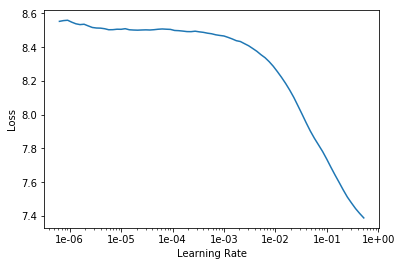

In [28]:
learn.recorder.plot(skip_end=15)

In [29]:
learn.fit_one_cycle(1, slice(1e-02,1e-01), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.975186,4.719396,0.268779


In [30]:
learn.save('lm_fit')
learn.save_encoder('lm_encoder')

In [31]:
learn.load('lm_fit');

In [32]:
learn.unfreeze()
learn.fit_one_cycle(5,1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.463269,4.383429,0.300633
2,4.290228,4.229945,0.311606
3,4.077565,4.137705,0.317830
4,3.821371,4.112394,0.322523
5,3.564839,4.173197,0.318864


In [33]:
learn.save('lm_ft')
learn.save_encoder('lm_ft_enc')

In [34]:
learn.load('lm_ft');

## Classification Part

In [11]:
data_clas = (TextList.from_csv(path,'sample.csv', vocab= data_lm.vocab)
             .split_from_df(col=4)
             .label_from_df(cols='tags', sep='|')
             .databunch())#bs=bs))
data_clas.save('data_clas')

In [17]:
data_clas = TextClasDataBunch.load(path, 'data_clas')#, bs=bs)
data_clas.show_batch()

text,target
xxbos xxup he - xxunk xxrep 4 d 5,c#;datagridview;winforms
xxbos xxup he - xxunk xxrep 4 8 c,python
xxbos xxup he - xxunk,java;jsp;maven;spring;spring-boot
xxbos xxup he - xxunk,swagger;swagger-editor
xxbos xxup he - xxunk,c;c++;devkitpro;programming-languages


In [18]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

In [19]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load_encoder('lm_ft_enc')
learn.metrics = [acc_02, f_score]
#learn.freeze()

In [20]:
learn.loss_func.func

BCEWithLogitsLoss()

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


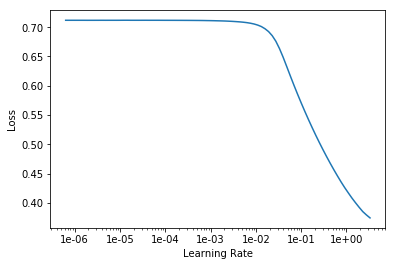

In [27]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(1,slice(1e-015,1e-005),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.694160,0.686232,0.000131,0.000526


In [18]:
learn.save('first')

In [28]:
learn.load('first');

In [29]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.001095,0.000661,0.999895,0.000000


In [30]:
learn.save('second')

In [34]:
learn.load('second');

In [35]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.001105,0.000660,0.999895,0.000000


In [36]:
learn.save('third')

In [21]:
learn.load('third');

In [22]:
df_test = pd.read_csv(path/'test.csv')
df_test.head()

,id,title,article
0,HE-efbc27d,How to display the current month in FTL code?,<p>How can I print the current month in a ftl ...
1,HE-d1fd267,OSX 10.8 mountain lion PEAR / PHPUnit not working,<p>I have installed Mountain Lion and I can't ...
2,HE-ffd4152,Update hidden input value with onclick event f...,<p>I'm working with MachForm and have this hid...
3,HE-d3ab268,transform a dijit select to a select list,"<p>salam,\r\r\r\r\nplease is it possible to r..."
4,HE-ed2fa45,Locking table database access for unregistered...,"<p>Good Day Guys,</p>\r\r\r\r\n\r\r\r\r\n<p>I ..."


In [38]:
test = df_test['article'][745]
test

"<p>I have two projects in my Eclipse A and B, A depends on B, so I added a section of ... to A's POM.xml. Locally, it works fine. I can run A which uses classes from B. However, In my Jenkins continuous build, it fails due to not being able to find the jar file for project B.</p>\r\r\r\r\n\r\r\r\r\n<p>I guess maybe there is no jar produced for project B, and I checked .m2 directory, it doesn't exist. How can I make it work for Jenkins's build for dependencies?</p>"

In [39]:
learn.predict(test)

(MultiCategory actionscript-2;adapter;adt;ajp;android-linearlayout;android-recyclerview;autoresize;aws-lambda;boolean;bower;case;checkbox;cloudfoundry;clpfd;cocoapods;collapse;command-line-arguments;cross-domain;css-animations;data-loss;database-permissions;db2;dynamic-programming;ef-database-first;expression;flush;folder;frequency;getresource;getter;google-calendar;google-maps-sdk-ios;graph-databases;grid;hardware;hibernate;highstock;ida;jax-rs;jogl;jruby;kernel;linear-algebra;locale;macos;magento-1.7;mathematical-optimization;mkmapview;opencart;openshift;panel;parameters;project-structure;removeclass;rename;restful-architecture;return-value;rstudio;shiny;shinydashboard;socket.io;spatial;sql-server-2014;ssrs-2008;stored-procedures;submit;symfony;tomcat6;tsql;validation;vector;wagtail;weather-api;windows-phone-7;windowsiot,
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([4.1560e-39, 4.1560e-39, 4.1560e-39,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]))

In [44]:
articles = list(df_test['article'].astype(str))
len(articles)

194323

In [ ]:
result = []
for i in articles:
    result.append(learn.predict(i)[0])